## Classical light with Quantum atom interaction
The hamiltonian of the Jaynes-Cummings model is given by
$$H = \hbar\omega_c \left(a^\dagger a + \frac{1}{2}\right) + \frac{\hbar\omega_a}{2} \sigma_z + {\frac{\hbar g}{2}} (a^\dagger\sigma_- + a \sigma_+)$$
where $\omega_c$ is the frequency of the cavity, $\omega_a$ is the frequency of the atom, $g$ is the coupling strength, $a$ is the annihilation operator of the cavity, and $\sigma_\pm = (\sigma_x \pm i\sigma_y)/2$ are the raising and lowering operators of the atom. The Hamiltonian is diagonalized by the annihilation operator of the cavity, $a$, and the raising and lowering operators of the atom, $\sigma_\pm$.

$$ a = \sqrt{\frac{m\omega_c}{2\hbar}} \left(x + \frac{i p}{m\omega_c}\right) \quad, \quad a^\dagger = \sqrt{\frac{m\omega_c}{2\hbar}} \left(x - \frac{i p}{m\omega_c}\right)$$

Here, $x$ is considered classical and the atom spin is considered quantum. The dynamics is governed as follows:
$$H_Q = \frac{\hbar\omega_a}{2} \sigma_z + \frac{\hbar g}{2} (a^\dagger\sigma_- + a \sigma_+)  \quad, \quad H_Q | \Psi \rangle = i \hbar \frac{\partial}{\partial t} | \Psi \rangle$$
$$H_{\text{eff}} = \hbar\omega_c \left(a^\dagger a + \frac{1}{2}\right) + \langle \Psi | H_Q | \Psi \rangle = \frac{p^2}{2m} + \frac{1}{2}m\omega_c^2 x^2 + \langle \Psi | H_Q | \Psi \rangle$$
$$\frac{dp}{dt} = -\frac{\partial H_{\text{eff}}}{\partial x} \quad, \quad \frac{dx}{dt} = \frac{\partial H_{\text{eff}}}{\partial p}$$

NOTE:- $a$ and $a^\dagger$ are just complex numbers and not operators in our case of considering light as classical and atom as quantum.


In [31]:
using QuantumOptics
using Plots
using LaTeXStrings

In [32]:
# Parameters
ωc = 0.1
ωa = 0.1
g = 1.
ħ = 1.
mass = 1.

# Bases for the spin states
b_spin = SpinBasis(1//2)

# spin operators
sig_m = sigmam(b_spin)
sig_p = sigmap(b_spin)
sig_z = sigmaz(b_spin)

# Interaction Hamiltonian H_Q
function interaction_hamiltonian(x, p; mass = 1., ωc= 0.1, ωa = 0.1, g = 1., ħ = 1.)
    a_dag = sqrt(mass*ωc/(2*ħ))*(x - im*p/(mass*ωc))
    H_Q = ħ*ωa*sig_z/2 + ħ*g*(a_dag*sig_m + a_dag'*sig_p)/2
    return H_Q
end

interaction_hamiltonian (generic function with 1 method)

In [33]:
# Initial state
Ψ0 = spindown(b_spin)
x0 = 0.
p0 = 1.
Δt = 0.1

# Arrays storing time evolution
Ψt = [Ψ0,]
xt = [x0,]
pt = [p0,]
St = [entropy_vn(Ψ0),] # von Neumann entropy

# Integration time
T = [0:Δt:200;]

# Simultanous evolution of the spin and the cavity
x = x0
p = p0
Ψ = Ψ0

for t in T[2:end]
    H_Q = interaction_hamiltonian(x, p; mass = mass, ωc = ωc, ωa = ωa, g = g, ħ = ħ)
    H_eff = expect(H_Q, Ψ) + 1/2*mass*ωc^2*x^2 + 1/2*p^2/mass

    # classical evolution
    dHeff_dx = mass*ωc^2*x + ħ*g/2*sqrt(mass*ωc/(2*ħ))*expect(sig_p + sig_m, Ψ)
    dHeff_dp = p/mass + ħ*g/2*sqrt(mass*ωc/(2*ħ))*(im/(mass*ωc))*expect(sig_p - sig_m, Ψ)

    global x += dHeff_dp*Δt
    global p -= dHeff_dx*Δt

    # schroedinger evolution
    # global Ψ += (one(b_spin) - im*H_Q*Δt/ħ)*Ψ
    global Ψ = timeevolution.schroedinger([0, Δt], Ψ, H_Q)[2][2]

    # # store results
    push!(xt, x)
    push!(pt, p)
    push!(Ψt, Ψ)
    push!(St, entropy_vn(Ψ))
    
end

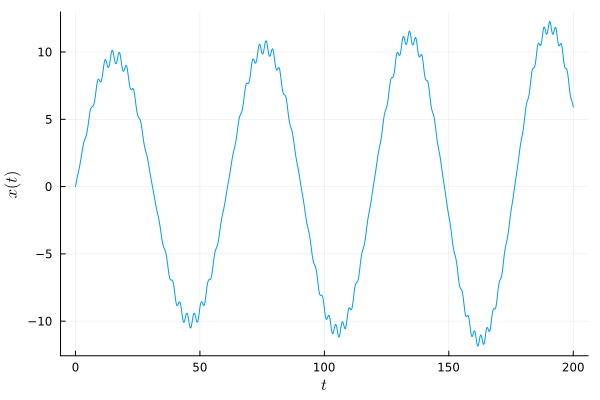

In [34]:
plot(T, xt, xlabel = L"t", ylabel = L"x(t)", legend = false)
# plot!(T, pt, label = "p")
# plot!(T, zeros(length(T)), label = "0")

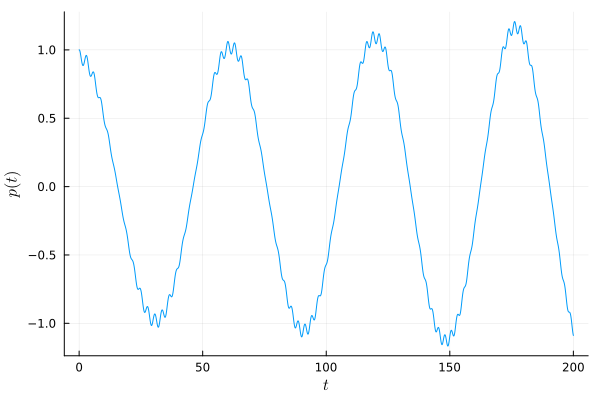

In [35]:
plot(T, pt, xlabel = L"t", ylabel = L"p(t)", legend = false)

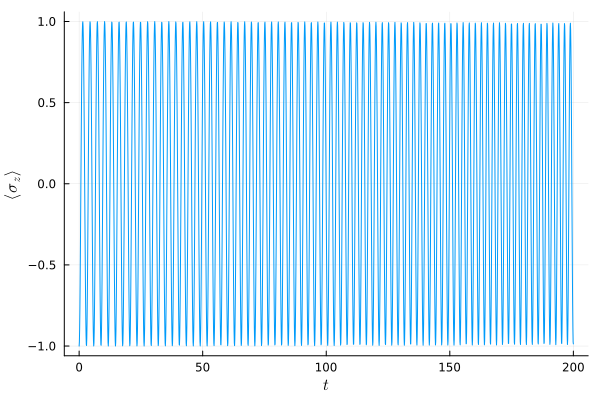

In [36]:
plot(T, real.(expect(sig_z, Ψt)), xlabel = L"t", ylabel = L"\langle \sigma_z \rangle", legend = false)

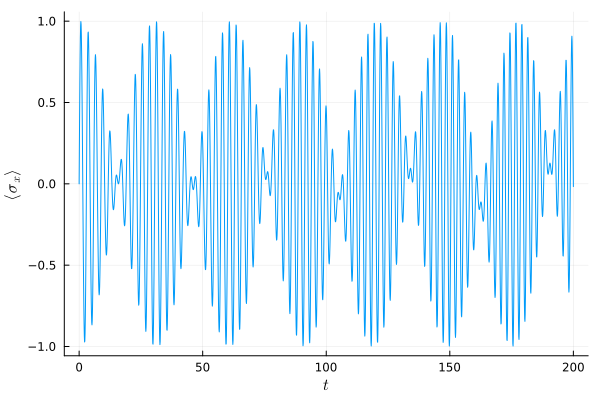

In [37]:
plot(T, real.(expect(sigmax(b_spin), Ψt)), xlabel = L"t", ylabel = L"\langle \sigma_x \rangle", legend = false)

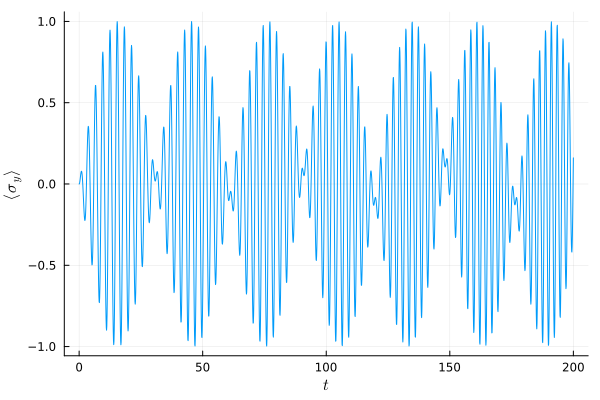

In [38]:
plot(T, real.(expect(sigmay(b_spin), Ψt)), xlabel = L"t", ylabel = L"\langle \sigma_y \rangle", legend = false)

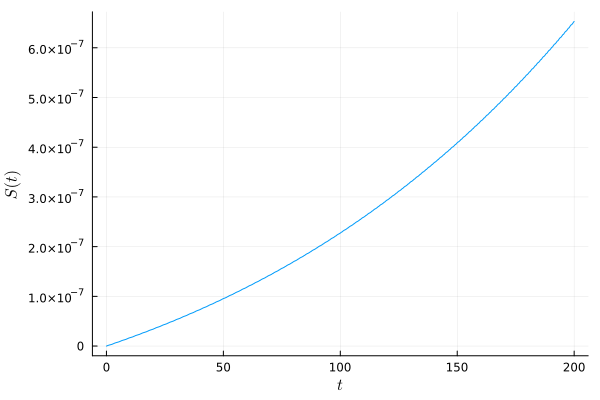

In [39]:
plot(T, real.(St), xlabel = L"t", ylabel = L"S(t)", legend = false)

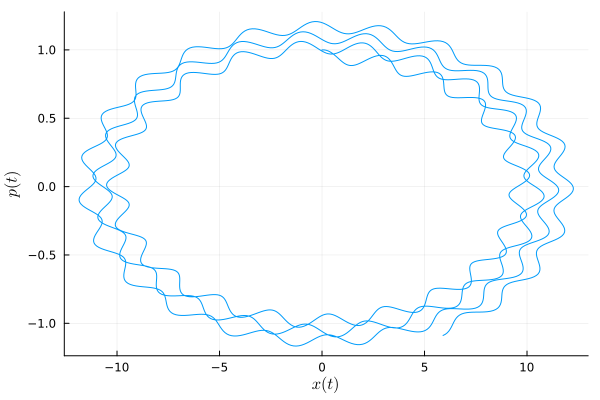

In [40]:
plot(xt, pt, xlabel = L"x(t)", ylabel = L"p(t)", legend = false)

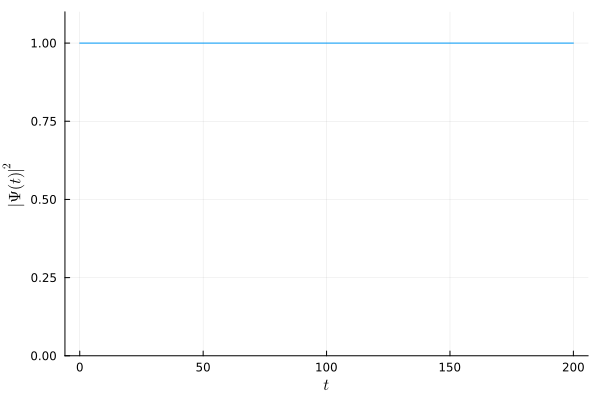

In [41]:
Ψt_arr = [Ψt_.data for Ψt_ in Ψt]
Prob_density = [sum(abs2.(Ψt_)) for Ψt_ in Ψt_arr]
plot(T, Prob_density, xlabel = L"t", ylabel = L"|\Psi(t)|^2", legend = false)
plot!(ylim = (0, 1.1))

## Both light and matter are considered Quantum
The hamiltonian of the Jaynes-Cummings model is given by
$$H = \hbar\omega_c \left(a^\dagger a + \frac{1}{2}\right) + \frac{\hbar\omega_a}{2} \sigma_z + \hbar g (a^\dagger\sigma_- + a \sigma_+)$$
where $\omega_c$ is the frequency of the cavity, $\omega_a$ is the frequency of the atom, $g$ is the coupling strength, $a$ is the annihilation operator of the cavity, and $\sigma_\pm = (\sigma_x \pm i\sigma_y)/2$ are the raising and lowering operators of the atom. The Hamiltonian is diagonalized by the annihilation operator of the cavity, $a$, and the raising and lowering operators of the atom, $\sigma_\pm$.

$$ a = \sqrt{\frac{m\omega_c}{2\hbar}} \left(x + \frac{\iota p}{m\omega_c}\right) \quad, \quad a^\dagger = \sqrt{\frac{m\omega_c}{2\hbar}} \left(x - \frac{\iota p}{m\omega_c}\right)$$

NOTE:- The following code and implementation is also given at https://docs.qojulia.org/examples/jaynes-cummings/#Jaynes-Cummings-model, but I have added it for completeness.

In [42]:
using QuantumOptics
using Plots, LaTeXStrings

In [43]:
# Parameters
N_cutoff = 10

ωc = 0.1
ωa = 0.1
g = 1.0
ħ = 1.0

# Bases for the spin states and the cavity modes
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1 // 2)
b = b_fock ⊗ b_spin

# Operators
a = destroy(b_fock)
a_dag = create(b_fock)
N = number(b_fock) # number operator for the cavity i.e, N = a†a

sig_m = sigmam(b_spin)
sig_p = sigmap(b_spin)
sig_z = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa * sig_z / 2 * ħ
Hfield = ωc * (N + 1/2*one(b_fock)) * ħ
Hint = g * (a_dag ⊗ sig_m + a ⊗ sig_p) * ħ / 2
H = one(b_fock) ⊗ Hatom + Hfield ⊗ one(b_spin) + Hint

Operator(dim=22x22)
  basis: [Fock(cutoff=10) ⊗ Spin(1/2)]sparse([1, 13, 2, 14, 3, 15, 4, 16, 5, 17  …  6, 18, 7, 19, 8, 20, 9, 21, 10, 22], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  18, 18, 19, 19, 20, 20, 21, 21, 22, 22], ComplexF64[0.1 + 0.0im, 0.5 + 0.0im, 0.2 + 0.0im, 0.7071067811865476 + 0.0im, 0.3 + 0.0im, 0.8660254037844386 + 0.0im, 0.4 + 0.0im, 1.0 + 0.0im, 0.5 + 0.0im, 1.118033988749895 + 0.0im  …  1.224744871391589 + 0.0im, 0.6 + 0.0im, 1.3228756555322954 + 0.0im, 0.7 + 0.0im, 1.4142135623730951 + 0.0im, 0.8 + 0.0im, 1.5 + 0.0im, 0.9 + 0.0im, 1.5811388300841898 + 0.0im, 1.0 + 0.0im], 22, 22)

In [44]:
# Initial state
α = 1.
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)
# coherentstate is a quantum state of the form exp(-|α|^2/2) * ∑_{n=0}^∞ α^n / sqrt(n!) |n> and 
# it's expectation values gives the classical EM field.

# Integration time
T = [0:0.1:100;]

# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H)

# expectation values
exp_N = real(expect(N ⊗ one(b_spin), Ψt))
exp_sig_z = real(expect(one(b_fock) ⊗ sig_z, Ψt))
exp_sig_x = real(expect(one(b_fock) ⊗ sigmax(b_spin), Ψt))
exp_sig_y = real(expect(one(b_fock) ⊗ sigmay(b_spin), Ψt));

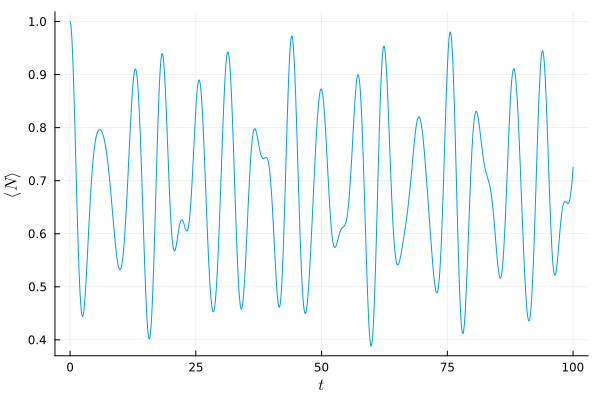

In [45]:
plot(T, exp_N, xlabel = L"t", ylabel = L"\langle N \rangle", legend = false)

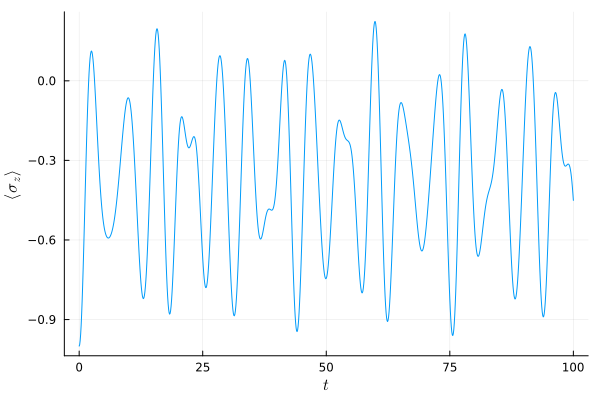

In [46]:
plot(T, exp_sig_z, xlabel = L"t", ylabel = L"\langle \sigma_z \rangle", legend = false)

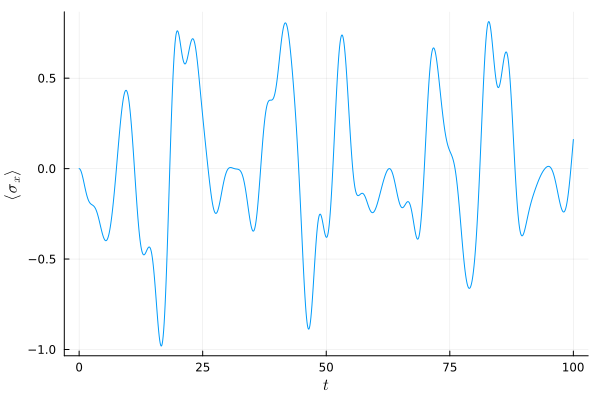

In [47]:
plot(T, exp_sig_x, xlabel = L"t", ylabel = L"\langle \sigma_x \rangle", legend = false)

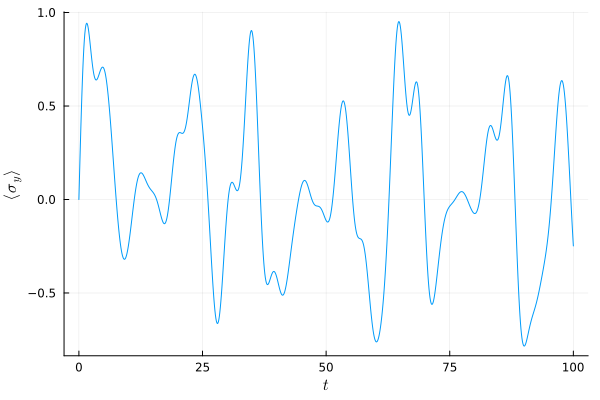

In [48]:
plot(T, exp_sig_y, xlabel = L"t", ylabel = L"\langle \sigma_y \rangle", legend = false)

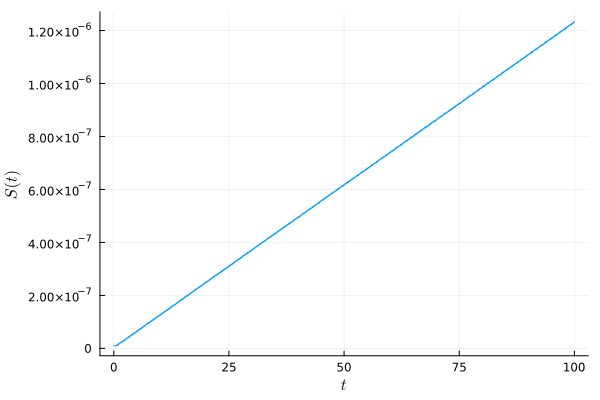

In [49]:
# Von Neumann entropy
S = [real(entropy_vn(Ψt_)) for Ψt_ in Ψt]
plot(T, S, xlabel = L"t", ylabel = L"S(t)", legend = false)